# If you just want to see the code of Mento Carlo Simulation and the result, please jump to Mento Carlo Simulation  part

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
S1 = pd.read_csv("Sensor1.csv")
S2 = pd.read_csv("Sensor2.csv")
S3 = pd.read_csv("Sensor3.csv")
S1.replace(0, np.nan, inplace=True)
S2.replace(0, np.nan, inplace=True)
S3.replace(0, np.nan, inplace=True)

In [2]:
S1 = S1.drop(columns=["Unnamed: 0"])
S2 = S2.drop(columns=["Unnamed: 0"])
S3 = S3.drop(columns=["Unnamed: 0"])

In [3]:
print("number of duplicate rows in sensor 1",S1.duplicated().sum())
print("number of duplicate rows in sensor 2",S2.duplicated().sum())
print("number of duplicate rows in sensor 3",S3.duplicated().sum())
S1 = pd.DataFrame.drop_duplicates(S1).reset_index()
S2 = pd.DataFrame.drop_duplicates(S2).reset_index()
S3 = pd.DataFrame.drop_duplicates(S3).reset_index()

number of duplicate rows in sensor 1 2190
number of duplicate rows in sensor 2 2190
number of duplicate rows in sensor 3 2190


In [11]:
S2 = S2.dropna().reset_index()

In [12]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_month = S2_avg.groupby(['year','month'],as_index=False).mean()
S2_month.head()

,year,month,level_0,index,countlineId,Pedestrian
0,2021,5,44.5,44.5,22995.0,1914.133333
1,2021,6,179.5,179.5,22995.0,2030.344444
2,2021,7,362.5,362.5,22995.0,1942.768817
3,2021,8,548.5,548.5,22995.0,1975.774194
4,2021,9,731.5,731.5,22995.0,1978.900000


In [13]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_avg["day"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.day
S2_day = S2_avg.groupby(['year','month','day'],as_index=False).mean()
S2_day.head()

,year,month,day,level_0,index,countlineId,Pedestrian
0,2021,5,17,2.5,2.5,22995.0,1867.666667
1,2021,5,18,8.5,8.5,22995.0,1925.166667
2,2021,5,19,14.5,14.5,22995.0,2071.833333
3,2021,5,20,20.5,20.5,22995.0,1119.833333
4,2021,5,21,26.5,26.5,22995.0,1712.666667


In [14]:
S2_avg = S2.copy()
S2_avg["month"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.month
S2_avg["year"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.year
S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week
S2_week = S2_avg.groupby(['year','month','week'],as_index=False).mean()
S2_week.head()

/var/folders/w_/ft1536ls3k3gvb2sks5dbg8h0000gn/T/ipykernel_61235/922864987.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  S2_avg["week"]=pd.to_datetime(S2_avg["UTC Datetime"]).dt.week


,year,month,week,level_0,index,countlineId,Pedestrian
0,2021,5,20,20.5,20.5,22995.0,1813.833333
1,2021,5,21,62.5,62.5,22995.0,1973.690476
2,2021,5,22,86.5,86.5,22995.0,2199.333333
3,2021,6,22,107.5,107.5,22995.0,2108.416667
4,2021,6,23,146.5,146.5,22995.0,2013.285714


In [15]:
from scipy import stats
S2_month_new = S2_month[(np.abs(stats.zscore(S2_month["Pedestrian"])) < 3)]
S2_week_new = S2_week[(np.abs(stats.zscore(S2_week["Pedestrian"])) < 3)]
S2_day_new = S2_day[(np.abs(stats.zscore(S2_day["Pedestrian"])) < 3)]

In [18]:
def sata_analy(data):
    print("skewness:",skew(data["Pedestrian"], axis=0, bias=True))
    print("kurtosis:",kurtosis(data["Pedestrian"], axis=0, bias=True))
    print("variance:",statistics.variance(data["Pedestrian"]))
    print("mean:",statistics.mean(data["Pedestrian"]))

In [19]:
print("S2 Month")
sata_analy(S2_month_new)
print("S2 Day")
sata_analy(S2_day_new)
print("S2 Week")
sata_analy(S2_week_new)

S2 Month
skewness: -0.5228112442297228
kurtosis: 0.3675094452286052
variance: 25711.883988575824
mean: 1879.8465378309465
S2 Day
skewness: -0.31615139913491985
kurtosis: 0.16281934720438418
variance: 142211.01986284333
mean: 1853.5546139359699
S2 Week
skewness: -1.408418104621216
kurtosis: 2.416434903118997
variance: 66684.97235950861
mean: 1846.3939623750734


## The Fitter test
### The fitter is a very convenient library to find the best distribution for random data

In [20]:
from fitter import Fitter, get_common_distributions, get_distributions

Fitting 10 distributions: 100%|█████████████████| 10/10 [00:00<00:00, 16.97it/s]


S2 weekly data 


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.000053,1602.907182,-1282.287606,inf,0.093774,3.834861e-01
norm,0.000059,1563.218491,-1271.746495,inf,0.160803,1.682958e-02
powerlaw,0.000081,1487.297018,-1239.012932,inf,0.204595,8.830494e-04
rayleigh,0.000097,1478.924690,-1227.242144,inf,0.314714,2.017107e-08
uniform,0.000100,1432.018148,-1224.851575,inf,0.391276,6.342935e-13


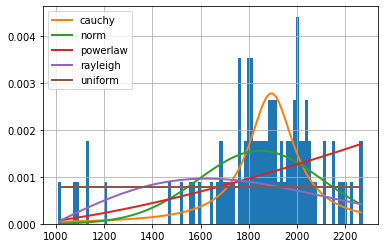

In [79]:
a = Fitter(S2_week_new["Pedestrian"],
           distributions= get_common_distributions()
                         )

a.fit()

print("S2 weekly data ")
a.summary()

In [80]:
print("the best distribution for weekly data will be")
a.get_best(method = 'sumsquare_error')

the best distribution for weekly data will be


{'cauchy': {'loc': 1892.928250823345, 'scale': 114.60926395306663}}

Fitting 10 distributions: 100%|█████████████████| 10/10 [00:00<00:00, 18.73it/s]


S2 monthly data 


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000998,1363.280411,-170.621231,inf,0.101259,0.983424
gamma,0.000999,1366.528475,-167.710400,inf,0.104703,0.977040
chi2,0.001000,1365.921065,-167.691363,inf,0.109758,0.965059
powerlaw,0.001027,1325.023054,-167.219900,inf,0.199789,0.414526
cauchy,0.001029,1418.540693,-170.073393,inf,0.116073,0.945513


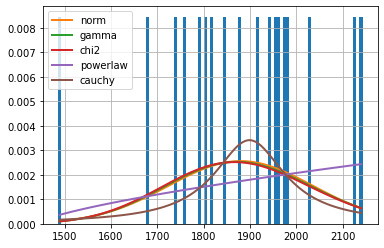

In [81]:
a = Fitter(S2_month_new["Pedestrian"],
           distributions= get_common_distributions())
a.fit()

print("S2 monthly data ")
a.summary()

In [82]:
print("the best distribution for monthly data will be")
a.get_best(method = 'sumsquare_error')

the best distribution for monthly data will be


{'norm': {'loc': 1879.8465378309463, 'scale': 155.83146662086736}}

Fitting 10 distributions: 100%|█████████████████| 10/10 [00:00<00:00, 12.88it/s]


S2 daily data


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.000005,1659.516293,-9794.699031,inf,0.046698,0.191109
lognorm,0.000005,1663.239584,-9788.113999,inf,0.043197,0.267211
gamma,0.000005,1658.423596,-9752.125967,inf,0.057309,0.058765
cauchy,0.000007,1674.761793,-9646.399376,inf,0.083825,0.001077
rayleigh,0.000007,inf,-9601.710944,inf,0.092542,0.000208


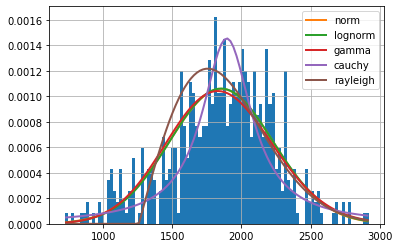

In [83]:
a = Fitter(S2_day_new["Pedestrian"],
           distributions= get_common_distributions())
a.fit()


print("S2 daily data")
a.summary()

In [85]:
print("the best distribution for daily data will be")
a.get_best(method = 'sumsquare_error')

the best distribution for daily data will be


{'norm': {'loc': 1853.5546139359699, 'scale': 376.75350363286134}}

## Anderson-Darling Test

In [27]:
from scipy.stats import anderson
print("S2 Month:")
print(anderson(S2_month_new["Pedestrian"]))
print("S2 Week:")
print(anderson(S2_week_new["Pedestrian"]))
print("S2 Day:")
print(anderson(S2_day_new["Pedestrian"]))

S2 Month:
AndersonResult(statistic=0.22868353271691788, critical_values=array([0.503, 0.573, 0.687, 0.802, 0.954]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
S2 Week:
AndersonResult(statistic=3.118403260867666, critical_values=array([0.553, 0.63 , 0.756, 0.882, 1.049]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
S2 Day:
AndersonResult(statistic=1.9661093977225619, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


### Based on Anderson-Darling Test, S2 Monthly data is the only data which statisitc number is smaller than critical, in other word, it is the only one which don't reject the null hypotheses from a normal distribution.

## Mento Carlo Simulation 

In [143]:
import sympy as smp
def mento(data,f):
    y,x,s,m = smp.symbols("x s m y")
    fs = smp.integrate(f,(x,0,y)).doit()
    Fn = smp.lambdify((y,s,m),fs)
    fn = smp.lambdify((x,s,m),f)
    s=data["Pedestrian"].std()
    m=statistics.mean(data["Pedestrian"])
    x = np.linspace(min(data["Pedestrian"]),max(data["Pedestrian"]),len(data["Pedestrian"]))
    f = fn(x,s,m)
    F = Fn(x,s,m)
    us = np.random.rand(len(data))
    F_inv = x[np.searchsorted(F[:-1],us)]
    plt.plot(x,f)
    plt.hist(F_inv,histtype="step",color="r",density="norm")
    plt.show()
    return F_inv

S2 Month


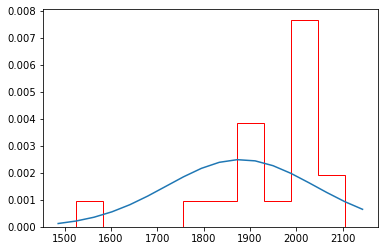

<AxesSubplot:>

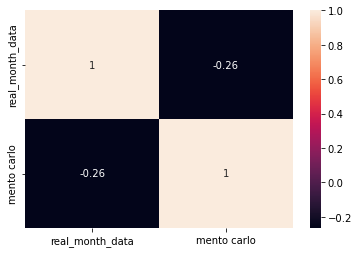

In [144]:
print("S2 Month")
y,x,s,m = smp.symbols("x s m y")
f = 1/(s*(np.pi*2)**(1/2))*smp.exp(-(x-m)**2/(2*s**2))
a = mento(S2_month_new,f)
data = {"real_month_data":S2_month_new["Pedestrian"],
       "mento carlo":a,
       }
data = pd.DataFrame(data)
sns.heatmap(data.corr(), annot = True)

S2 week


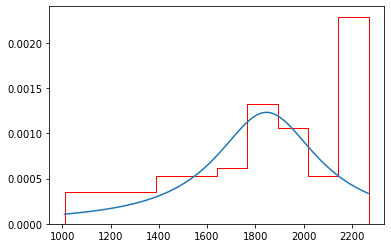

<AxesSubplot:>

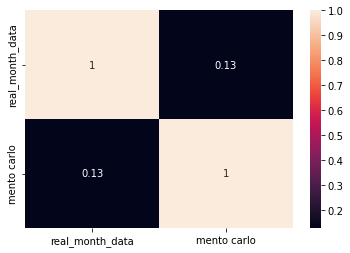

In [145]:
print("S2 week")
y,x,s,m = smp.symbols("x s m y")
f = 1/(np.pi*s*(1+((x-m)/s)**2))
a = mento(S2_week_new,f)
data = {"real_month_data":S2_week_new["Pedestrian"],
       "mento carlo":a,
       }
data = pd.DataFrame(data)
sns.heatmap(data.corr(), annot = True)

S2 day


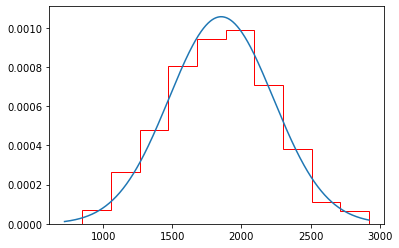

<AxesSubplot:>

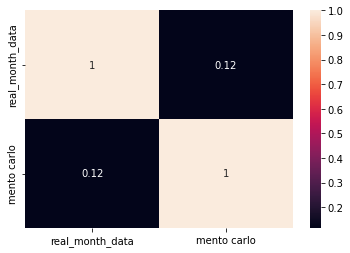

In [93]:
print("S2 day")
y,x,s,m = smp.symbols("x s m y")
f = 1/(s*(np.pi*2)**(1/2))*smp.exp(-(x-m)**2/(2*s**2))
a = mento(S2_day_new,f)
data = {"real_month_data":S2_day_new["Pedestrian"],
       "mento carlo":a,
       }
data = pd.DataFrame(data)
sns.heatmap(data.corr(), annot = True)

# Conclusion

### After repeated testing, I found that the mento carlo simulation is very unstable, sometimes the generated random values will be kind of close to the real value, but sometimes it will be far away. Also the file you see is the one I have adjusted a bit, which means that all the data are the result after I have removed all the extreme values. Based on the fitter test results (you can see the detailed icons and conclusions in the fitter test part), the normal distribution can be applied to the daily and monthly data, while the cauchy distribution is matched to the weekly data. Also, at the beginning I tried to use the beta distribution for testing, and although the results were good I gave up since the beta distribution only produces a value between 0 and 1. All in all, mento carlo simulation has many limitations, and the best score of correlation for mento carlo simulation is only 0.5, so I personally think it is not suitable to use it to predict missing values
